In [1]:
from inference import MaskRCNNInference
import cv2
import numpy as np
import matplotlib.pyplot as plt
from utils import combine_masks
import pandas as pd

In [2]:
model_inference = MaskRCNNInference(checkpoint='pytorch_model-e9.bin')

Loading: pytorch_model-e9.bin


In [3]:
img_path = '/workspace/images/livecell_test_images/A172_Phase_C7_1_00d00h00m_2.tif'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
# img = torch.from_numpy(img).float()

In [4]:
preds = model_inference.predict(img)

/opt/conda/lib/python3.7/site-packages/torchvision/ops/boxes.py:101: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629403081/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  keep = keep.nonzero().squeeze(1)


In [5]:
def visualise_pred(img, preds) -> None:
    """
    Print original image, ground true with segmentation masks and bounding boxes,
    and prediction image.
    """
#     img, targets = ds_train[sample_index]
    #print(img.shape)
#     l = np.unique(targets["labels"])
#     print(targets['labels'])
#     l = pd.Series(targets['labels'].cpu().numpy()).value_counts()
    
    ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,60), facecolor="#fefefe")
    ax[0].imshow(img)
    ax[0].set_title(f"cell type {1}")
    ax[0].axis("off")
    
    masks = combine_masks(preds, 0.5)
    #plt.imshow(img.numpy().transpose((1,2,0)))
    ax[1].imshow(masks)
    ax[1].set_title(f"Predicted number of cells, {len(preds)} cells")
    ax[1].axis("off")

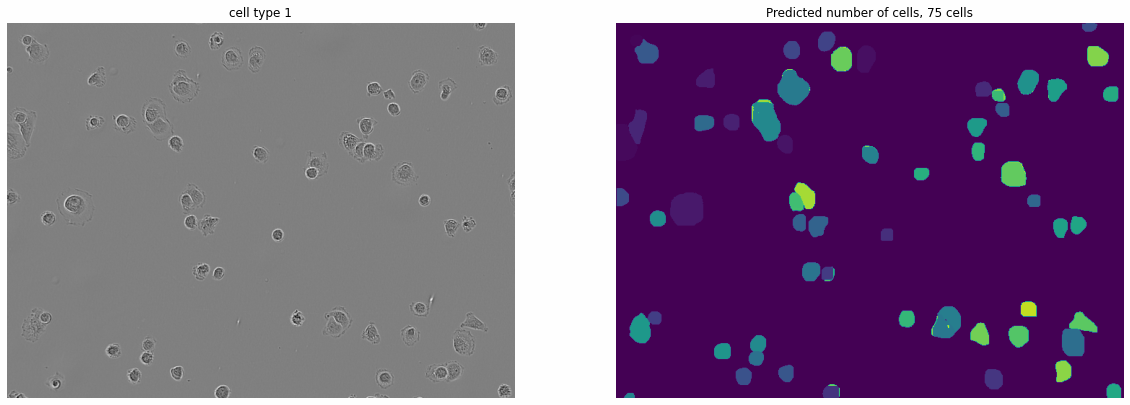

In [6]:
visualise_pred(img, preds)